# **Jacob Shearer - Final Exam**

In [2]:
import numpy as np
import scipy as sp
from scipy.stats import qmc
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import random

**Question 1:**

I'm going to use 2D quasi-monte carlo integration for this problem. Error for quasi-monte carlo integration over $D$ dimensions scales like this:
</br>
</br>
$$ \sigma_{qmc} = \frac{1}{N}$$
</br>
where $N$ is the total number of points used in the integration. Therefore, to achieve six significant figures of predicted accuracy (an error of $1\cdot10^{-7}$ to be safe), we would need:
</br>
</br>
$$N = \frac{1}{\sigma_{qmc}} = \frac{1}{1 \cdot10^{-7}} = 1\cdot 10^{7}$$

In [40]:
def truncator(array, places):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        new_array[i] = float(f'%.{places}f' % array[i])
    
    return new_array

def integrand(x, y):
    # the constants out front become one when rho = 4*pi*eps_0
    denom = np.sqrt((x - xp)**2 + (y - yp)**2)
    return 1/denom

In [50]:
def integration_qMC_2d(integrand, a1, b1, a2, b2, N):
    int_sum = 0
    halton_sampler = qmc.Halton(d=2, scramble=True)
    x_halton = halton_sampler.random(N)
    for i in range(N):
        x = x_halton[i,0]*(b1-a1) + a1
        y = x_halton[i,1]*(b2-a2) + a2
        int_sum += integrand(x, y)
    result = (b2 - a2) * (b1 - a1) * int_sum/N
    return result

In [51]:
N = int(1e7)

x_p = np.array([2, 4, 6, 8, 10])
y_p = np.array([2, 4, 6, 8, 10])
phi = np.zeros((5, 5))
for i in range(len(x_p)):
    xp = x_p[i]
    for j in range(len(y_p)):
        yp = y_p[j]
        integrals = integration_qMC_2d(integrand, -1, 1, -1, 1, N)
        phi[i, j] = integrals

Phi(x_p, y_p):
x_p=10  0.39286  0.371927 0.343421 0.312668 0.28308  
x_p=8   0.486261 0.448154 0.400675 0.354019 0.312668 
x_p=6   0.63511  0.556518 0.472517 0.400675 0.343421 
x_p=4   0.902178 0.710954 0.556518 0.448154 0.371927 
x_p=2   1.449395 0.902178 0.63511  0.486261 0.39286  
        y_p=2    y_p=4    y_p=6    y_p=8    y_p=10




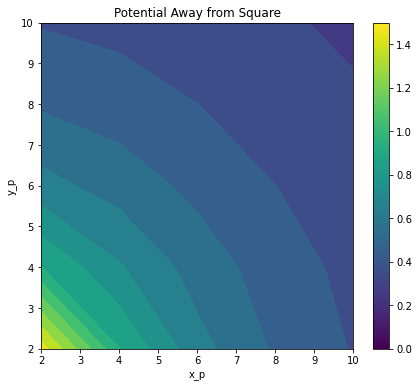

In [61]:
phi_reversed = phi[::-1]
print('Phi(x_p, y_p):')
print(f'x_p=10 {truncator(phi_reversed[0], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=8  {truncator(phi_reversed[1], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=6  {truncator(phi_reversed[2], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=4  {truncator(phi_reversed[3], 6)}'.replace('[', ' ').replace(']', ' '))
print(f'x_p=2  {truncator(phi_reversed[4], 6)}'.replace('[', ' ').replace(']', ' '))
print('        y_p=2    y_p=4    y_p=6    y_p=8    y_p=10')
print('\n')

fig, ax = plt.subplots(figsize=(7, 6))
qcs = ax.contourf(x_p, y_p, phi, levels=np.arange(0, 1.6, 0.1))
ax.set_xlabel('x_p')
ax.set_ylabel('y_p')
ax.set_title('Potential Away from Square')
fig.colorbar(ScalarMappable(norm=qcs.norm, cmap=qcs.cmap))
plt.show()

**Question 2:**

Part (a):

This boundary value problem can be solved using the finite difference method. We can derive an expression for $p_i$ on the $\text{j}^{\text{th}}$ iteration via the following logic:
</br>
</br>
$$\frac{d^2P}{dx^2}|_{i} = \frac{P_{i+1} - 2P_i + P_{i-1}}{h^2}$$
</br>
$$\frac{dP}{dx}|_{i} = \frac{P_{i+1} - P_{i-1}}{2h}$$
</br>
$$\rightarrow \frac{P_{i+1}}{h^2} - \frac{2P_{i}}{h^2} + \frac{P_{i-1}}{h^2} = \frac{2P_{i-1}}{h} - \frac{2P_{i-1}}{h} -10P_i + 10x_i$$
</br>
$$\rightarrow P_i(10 - \frac{2}{h^2}) = (\frac{2}{h} - \frac{1}{h^2})P_{i+1} - (\frac{2}{h} + \frac{1}{h^2})P_{i+1} + 10x_i$$
</br>
$$\rightarrow P_i(10h^2 - 2) = -(1-2h)P_{i+1} - (1+2h)P_{i-1} + 10x_i$$
</br>
$$\rightarrow P_i = \frac{1}{2 - 10h^2}[(1-2h)P_{i+1} + (1+2h)P_{i-1} - 10x_i]$$
</br>
$$\rightarrow P_i^{(j)} = \frac{1}{2 - 10h^2}[(1-2h)P_{i+1}^{(j-1)} + (1+2h)P_{i-1}^{(j-1)} - 10x_i]$$

Iteration 1420:
[  0.           2.65383329   5.57690986   8.77857377  12.26727369
  16.05040692  20.13415358  24.52330105  29.22105866  34.22886292
  39.54617373  45.17026167  51.09598723  57.31557231  63.81836497
  70.59059813  77.61514337  84.87126095  92.33434735  99.97568184
 107.76217383 115.65611263 123.61492193 131.59092098 139.53109503
 147.37687767 155.06394776 162.52204425 169.67480187 176.43961148
 182.72750847 188.44309334 193.48448853 197.74333573 201.10483831
 203.44785346 204.645039   204.56305984 203.0628592  200.        ]




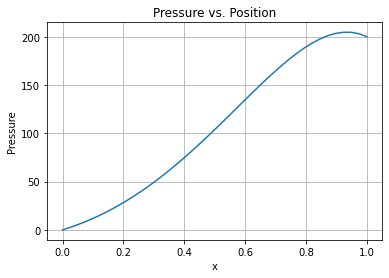

In [8]:
N = 40
(x_grid_points, h) = np.linspace(0, 1, N, retstep=True)
c1 = 1.0 - 2*h
c2 = 1.0 + 2*h
c3 = -10.0 * pow(h,2)
c4 = 2.0 + c3

old_p_values = np.zeros(N)
old_p_values[0] = 0  # B.C. at x = 0
old_p_values[N-1] = 200  # B.C. at x = 1
p_values = old_p_values.copy()

tolerance = 0.0001
achieved_tolerance = False
iteration = 0
while not achieved_tolerance:
    iteration += 1
    achieved_tolerance = True
    for i in range(1,N-1):
        pp = 1/c4 * (c1*old_p_values[i+1] + c2*old_p_values[i-1] + c3*x_grid_points[i])
        if (abs((pp-p_values[i]))/pp > tolerance):
            achieved_tolerance = False
        p_values[i] = pp
        old_p_values[i] = pp
    
print(f'Iteration {iteration}:')
print(p_values)
print('\n')
plt.plot(x_grid_points, p_values)
plt.xlabel('x')
plt.ylabel('Pressure')
plt.grid()
plt.title('Pressure vs. Position')
plt.show()

Part (b):

Iteration 90:
[  0.           2.75621953   5.79190691   9.11633218  12.73777333
  16.66335603  20.89888401  25.44866008  30.31529785  35.49952388
  40.99997042  46.81295845  52.93227089  59.34891569  66.05087851
  73.0228643   80.24602724  87.69768801  95.35103719 103.17482332
 111.13302358 119.18449476 127.2826016  135.37481872 143.40230197
 151.29942385 158.99326678 166.4688751  173.58019083 180.26212303
 186.42219279 191.96154143 196.77492325 200.75074158 203.77113283
 205.7121031  206.44372229 205.83038088 203.73111425 200.        ]




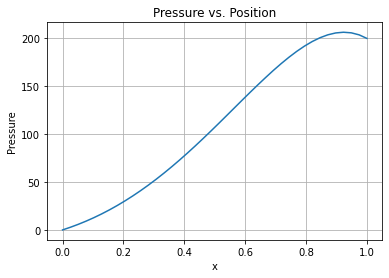

In [38]:
N = 40
alpha = 0.91
(x_grid_points, h) = np.linspace(0, 1, N, retstep=True)
c1 = 1.0 - 2*h
c2 = 1.0 + 2*h
c3 = -10.0 * pow(h,2)
c4 = 2.0 + c3

old_p_values = np.zeros(N)
old_p_values[0] = 0
old_p_values[N-1] = 200
p_values = old_p_values.copy()

tolerance = 0.0001
achieved_tolerance = False
iteration = 0
while not achieved_tolerance:
    iteration += 1
    achieved_tolerance = True
    for i in range(1,N-1):
        pp = 1/c4 * (c1*old_p_values[i+1] + c2*old_p_values[i-1] + c3*x_grid_points[i])
        if (abs((pp-p_values[i]))/pp > tolerance):
            achieved_tolerance = False
        p_values[i] = pp + alpha*(pp - old_p_values[i])
        old_p_values[i] = p_values[i]
    
print(f'Iteration {iteration}:')
print(p_values)
print('\n')
plt.plot(x_grid_points, p_values)
plt.xlabel('x')
plt.ylabel('Pressure')
plt.grid()
plt.title('Pressure vs. Position')
plt.show()

The best value of $\alpha$ that I could find was $\alpha = 0.91$, and with that $P(x)$ only takes 90 iterations to converge (v.s. the 1420 that it took without successive over-relaxation).

**Question 3:**

Part (a):

Euler's method for this differential equation is given by the following:
</br>
</br>
$$q(t+h) = q(t) + h(\frac{1}{R}(U(t) - \frac{q(t)}{C}))$$
</br>
With this we can find $q(t)$ and $I(t)$ (because $I(t)$ is just the second term divided by $h$).

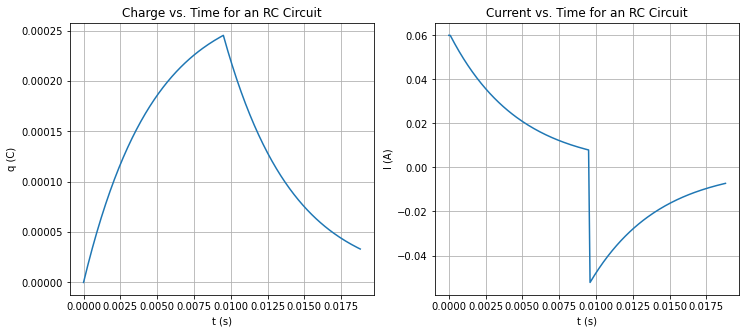

In [8]:
R = 100
C = 4.7e-5
RC = 0.0047

h = 0.0001

t = np.arange(0, 4*RC + h, h)
U = np.zeros(len(t))
for i in range(len(U)):
    if t[i] <= 2*RC:
        U[i] = 6
    else:
        U[i] = 0

q = np.zeros(len(t))
q[0] = 0  # Initial charge

I = np.zeros(len(t))
I[0] = (U[0]/R - q[0]/(R*C))  # Initial current

for i in range(0, len(q)-1):  # Euler method
    q[i+1] = q[i] + h * ((U[i]/R - q[i]/(R*C)))
    I[i+1] = (U[i]/R - q[i]/(R*C))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(t, q)
ax1.set_xlabel('t (s)')
ax1.set_ylabel('q (C)')
ax1.set_title('Charge vs. Time for an RC Circuit')
ax1.grid()

ax2.plot(t, I)
ax2.set_xlabel('t (s)')
ax2.set_ylabel('I (A)')
ax2.set_title('Current vs. Time for an RC Circuit')
ax2.grid()

plt.show()

Part (b):

In [9]:
def Heaviside(t, t_c):
    H = np.zeros(len(t))
    for i in range(len(t)):
        if t[i] < t_c:
            H[i] = 0
        else:
            H[i] = 1
    
    return H

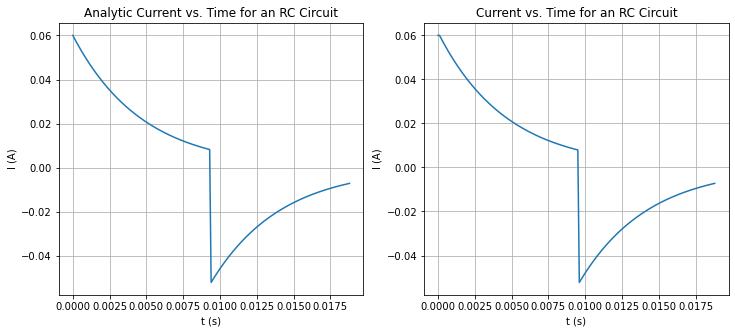

In [10]:
analytic_I = (6/R) * (np.e**(-t/RC)*Heaviside(t, 0) - np.e**(-(t-2*RC)/RC)*Heaviside(t, 2*RC))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(t, analytic_I)
ax1.set_xlabel('t (s)')
ax1.set_ylabel('I (A)')
ax1.set_title('Analytic Current vs. Time for an RC Circuit')
ax1.grid()

ax2.plot(t, I)
ax2.set_xlabel('t (s)')
ax2.set_ylabel('I (A)')
ax2.set_title('Current vs. Time for an RC Circuit')
ax2.grid()

plt.show()

These two plots look pretty close, so it's probably fair to say that the numerical result is accurate.